In [59]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_confusion_matrix 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, classification_report
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv("../Social_Network_Ads.csv")

In [27]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [28]:
def gender_encoder(value):
    if value=="male":
        return 1
    elif value=="female":
        return -1;
    else:
        return 0

In [29]:
df["Gender"].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [30]:
df["Gender"] = df["Gender"].apply(gender_encoder)

In [31]:
df["Gender"].value_counts()

0    400
Name: Gender, dtype: int64

In [32]:
x = df[["Age","EstimatedSalary"]]
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [33]:
y = df["Purchased"]
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

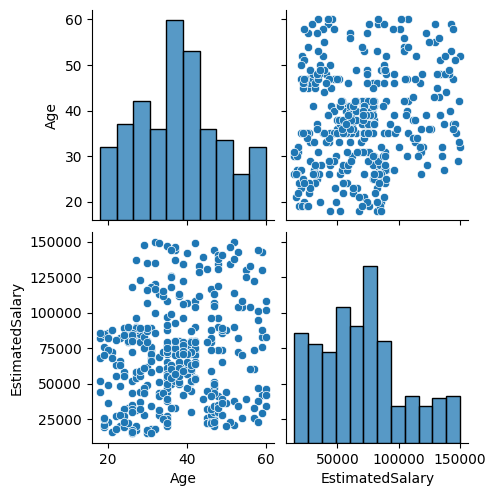

In [37]:
sns.pairplot(x)
plt.show()

In [38]:
scaler = StandardScaler()

In [39]:
x = scaler.fit_transform(x)
x

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [41]:
x_train

array([[-0.82666613,  0.15438573],
       [ 0.03295203,  0.30121002],
       [ 0.70154394, -1.28449224],
       [ 1.5611621 ,  1.123426  ],
       [ 0.79705706, -1.37258681],
       [-1.39974491, -1.22576253],
       [-0.0625611 ,  0.15438573],
       [ 0.41500455, -0.13926283],
       [-0.25358736,  0.03692631],
       [ 1.27462271,  2.23929055],
       [ 0.12846516,  0.77104772],
       [-1.30423178,  0.56549373],
       [ 1.94321462,  0.74168287],
       [-1.20871865, -1.40195167],
       [ 0.31949142, -0.31545197],
       [-0.92217926,  0.56549373],
       [ 0.41500455,  0.30121002],
       [ 0.41500455,  1.123426  ],
       [ 0.79705706,  0.77104772],
       [ 0.89257019,  1.27025028],
       [-0.44461362, -1.22576253],
       [-1.78179743, -1.3138571 ],
       [ 1.08359645,  0.56549373],
       [-0.63563988, -1.60750566],
       [-0.73115301,  0.27184516],
       [ 0.98808332,  2.09246627],
       [-0.54012675,  1.38770971],
       [-0.0625611 ,  0.03692631],
       [-1.87731056,

In [42]:
y_train

157    0
109    0
17     1
347    1
24     1
      ..
71     0
106    0
270    0
348    0
102    0
Name: Purchased, Length: 280, dtype: int64

In [45]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [46]:
y_predict = lr.predict(x_test)

In [47]:
y_test

209    0
280    1
33     0
210    1
93     0
      ..
60     0
79     0
285    1
305    0
281    0
Name: Purchased, Length: 120, dtype: int64

In [48]:
y_predict

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [53]:
matrix = confusion_matrix(y_predict,y_test)

matrix

array([[71, 16],
       [ 2, 31]], dtype=int64)

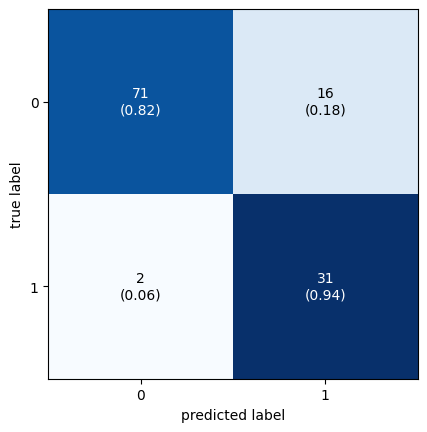

In [63]:
plot_confusion_matrix(conf_mat=matrix, show_normed=True)
plt.show()

In [64]:
accuracy_score(y_test,y_predict)

0.85

In [65]:
1-accuracy_score(y_test,y_predict)

0.15000000000000002

In [72]:
precision_score(y_test,y_predict)

0.9393939393939394

In [73]:
recall_score(y_test,y_predict)

0.6595744680851063

In [69]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89        73
           1       0.94      0.66      0.78        47

    accuracy                           0.85       120
   macro avg       0.88      0.82      0.83       120
weighted avg       0.86      0.85      0.84       120

